# **Diffusers / Stable Diffusion 1.4 Experiments**

In [ ]:
# install dependencies.
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy
!pip install ipywidgets==7.7.2

In [ ]:
# grab user access token through huggingface
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# import libraries.
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [ ]:
# check which GPU you are using.
!nvidia-smi

Mon Sep 19 14:27:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# create the pipeline.
experimental_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)

In [ ]:
# shift the pipeline for faster inference.
experimental_pipe = experimental_pipe.to("cuda")

  0%|          | 0/51 [00:00<?, ?it/s]

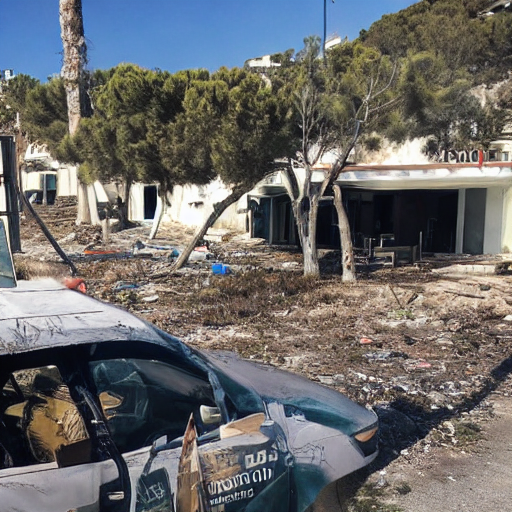

In [ ]:
# generate images.
description_one = "juan les pins postapocalyptic"
with autocast("cuda"):
  image_one = experimental_pipe(description_one).images[0]
image_one
# if one wants to save the image.
# image_one.save(f"image.png")

  0%|          | 0/51 [00:00<?, ?it/s]

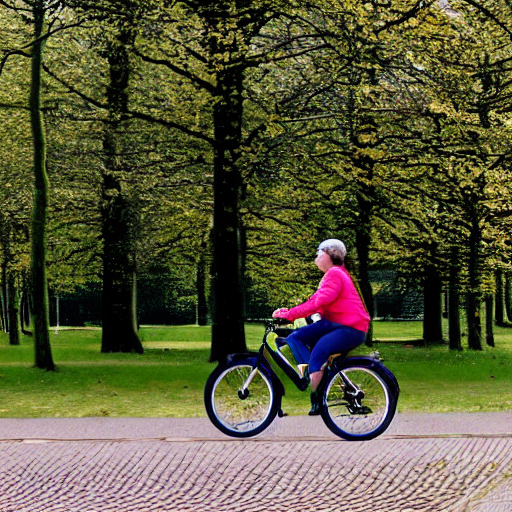

In [ ]:
description_two = "a person biking in the Netherlands"
with autocast("cuda"):
  image_two = experimental_pipe(description_two).images[0]
image_two

  0%|          | 0/51 [00:00<?, ?it/s]

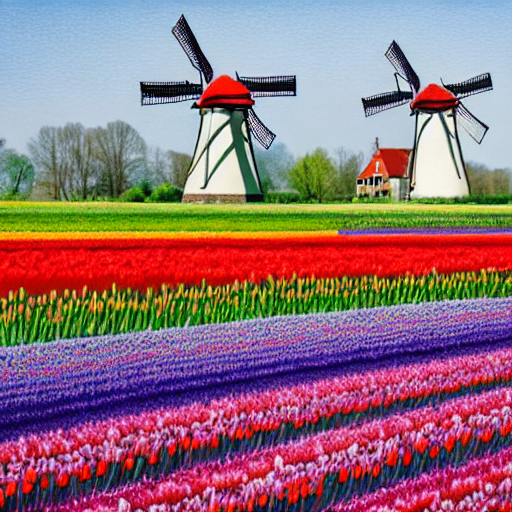

In [ ]:
description_three = "Tulips and windmills in a countryside"
with autocast("cuda"):
  image_three = experimental_pipe(description_three).images[0]
image_three

In [ ]:
# prepare to display the above images in a grid.
num_images = 3
description = [description_two]*num_images
with autocast("cuda"):
  experiment_image = experimental_pipe(description).images

  0%|          | 0/51 [00:00<?, ?it/s]

In [ ]:
# defining the grid itself.
def grids(img, rows, cols):
    assert len(img) == rows*cols

    width, height = img[0].size
    grid = Image.new('RGB', size=(cols*width, rows*height))
    grid_width, grid_heigth = grid.size

    for i, img in enumerate(img):
        grid.paste(img, box=(i%cols*width, i//cols*height))
    return grid

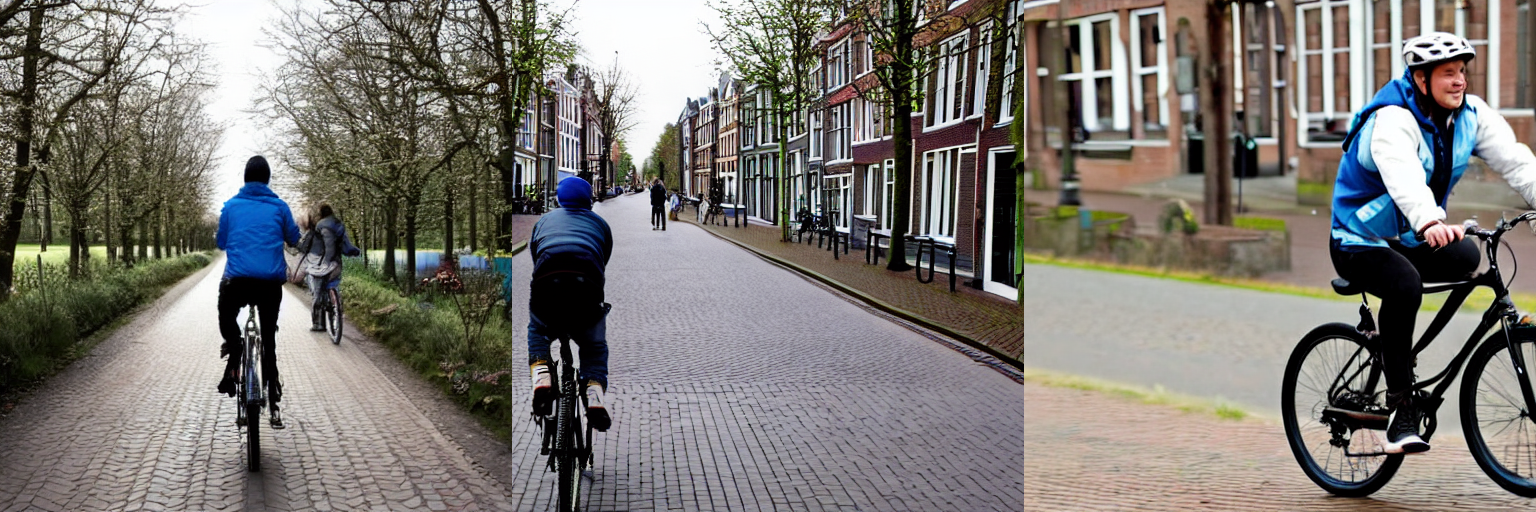

In [ ]:
grid = grids(experiment_image, rows=1, cols=3)
grid